#### 使用基于ReLU的神经网络来拟合函数

Epoch [100/1000], Loss: 2.036438
Epoch [200/1000], Loss: 1.285847
Epoch [300/1000], Loss: 0.931745
Epoch [400/1000], Loss: 0.777435
Epoch [500/1000], Loss: 0.693071
Epoch [600/1000], Loss: 0.645659
Epoch [700/1000], Loss: 0.611493
Epoch [800/1000], Loss: 0.587250
Epoch [900/1000], Loss: 0.566302
Epoch [1000/1000], Loss: 0.552450


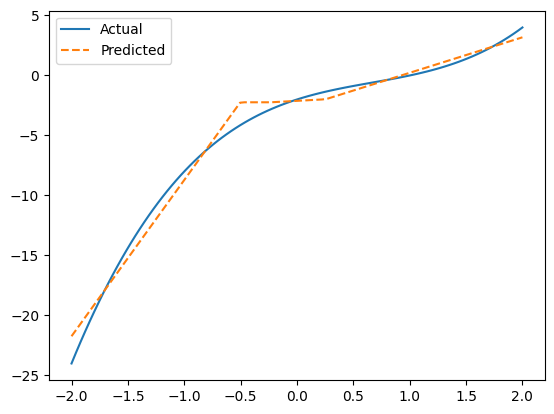

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# 生成训练数据
x = np.linspace(-2, 2, 100).reshape(-1, 1)
y = x**3 - 2*x**2 + 3*x - 2

# 定义神经网络模型
class ReLU_Net(nn.Module):
    def __init__(self):
        super(ReLU_Net, self).__init__()
        self.fc1 = nn.Linear(1, 4)  # 输入层到隐藏层
        self.fc2 = nn.Linear(4, 1)  # 隐藏层到输出层

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # 隐藏层使用ReLU激活函数
        x = self.fc2(x)  # 输出层

        return x

# 实例化神经网络
net = ReLU_Net()

# 定义损失函数和优化器
criterion = nn.MSELoss()  # 使用均方误差作为损失函数
optimizer = optim.SGD(net.parameters(), lr=0.01)  # 随机梯度下降作为优化器

# 训练神经网络
for epoch in range(1000):
    inputs = torch.from_numpy(x.astype(np.float32))
    labels = torch.from_numpy(y.astype(np.float32))

    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print('Epoch [{}/{}], Loss: {:.6f}'.format(epoch+1, 1000, loss.item()))

# 绘制拟合结果
x_test = np.linspace(-2, 2, 100).reshape(-1, 1)
x_tensor = torch.from_numpy(x_test.astype(np.float32))
y_pred = net(x_tensor).detach().numpy()

plt.plot(x, y, label='Actual')
plt.plot(x_test, y_pred, label='Predicted', linestyle='--')
plt.legend()
plt.show()